In [2]:
from __future__ import print_function
import numpy as np
import sys
sys.path.append('/Users/pawnoutlet/Documents/fdfault/data')
import fdfault
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cff_w_distanc1= np.loadtxt('statistics_stress.out',delimiter=',')
print(cff_w_distanc1.shape)
total_dim_x= 1602
histogram= np.ones((101,80))
distance_array= np.linspace( 5, 0,cff_w_distanc1.shape[0] ) 

(101, 80100)


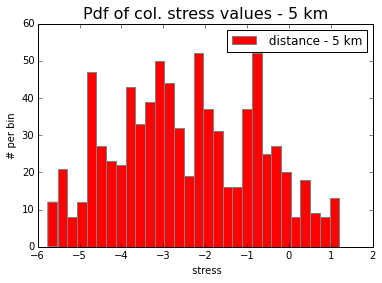

In [4]:
plt.hist(cff_w_distanc1 [0,0:801], bins=30, facecolor='red', edgecolor='gray', label= ' distance - 5 km')
plt.xlabel(' stress')
plt.ylabel('# per bin')
plt.title('Pdf of col. stress values - 5 km', fontsize=16,color='black')
plt.legend( loc='upper right')
#plt.show()

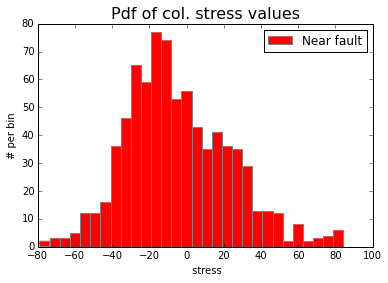

In [5]:
plt.hist(cff_w_distanc1 [95,0:801], bins=30, facecolor='red', edgecolor='gray', label= 'Near fault')
plt.xlabel(' stress')
plt.ylabel('# per bin')
plt.title('Pdf of col. stress values', fontsize=16,color='black')
plt.legend( loc='upper right')
#plt.show()

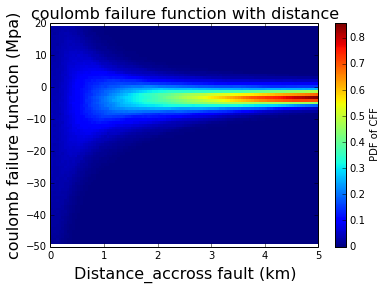

In [6]:
max_stress= 20
#max_stress= cff_w_distanc1.max()
min_stress=-50
#min_stress= cff_w_distanc1.min()
for ii in range(101):
	for jj in range(cff_w_distanc1.shape[1]):
		if cff_w_distanc1[ii,jj] > max_stress:
			cff_w_distanc1[ii,jj] = max_stress
		if cff_w_distanc1[ii,jj] < min_stress:
			cff_w_distanc1[ii,jj] = min_stress

cff_w_distanc1[:,0]= min_stress
cff_w_distanc1[:,cff_w_distanc1.shape[1]-1]= max_stress

#plt.hist(cff_w_distanc1 [0,0:total_dim_x], bins=80)
#plt.show()

for ii in range(101):

 hist, edges = np.histogram(cff_w_distanc1[ii,:], bins=80)
 histogram[ii,:]= hist
# # 	plt.plot(hist)

x,y= np.meshgrid(distance_array, edges[1:len(edges)-1], indexing='ij')
plt.pcolor(x,y, histogram[:,1:cff_w_distanc1.shape[1]-1])
# print( hist.shape, edges.shape)
cbar = plt.colorbar()
#plt.colorbar()
cbar.set_label(' PDF of CFF', rotation=90)
cbar.ax.set_yticklabels(['0', '0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.xlabel('Distance_accross fault (km)', fontsize=16, color='black')
plt.ylabel('coulomb failure function (Mpa)', fontsize=16, color='black') 
plt.ylabel('coulomb failure function (Mpa)', fontsize=16, color='black') 
plt.title('coulomb failure function with distance ', fontsize=16, color='black') 
plt.show()


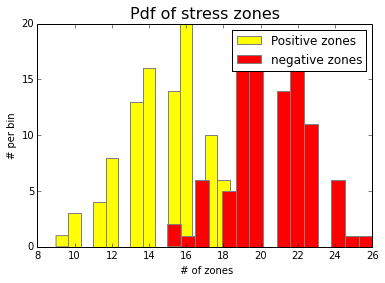

In [7]:
positive_zones= np.loadtxt('positive_zones.out',delimiter=',')
negative_zones= np.loadtxt('negative_zones.out',delimiter=',')


plt.hist(positive_zones, bins= 15, facecolor='yellow', edgecolor='gray', label='Positive zones')
plt.hist(negative_zones, bins= 15, facecolor='red', edgecolor='gray', label='negative zones')
plt.xlabel(' # of zones')
plt.ylabel('# per bin')
plt.title('Pdf of stress zones', fontsize=16,color='black')
plt.legend( loc='upper right')
plt.show()

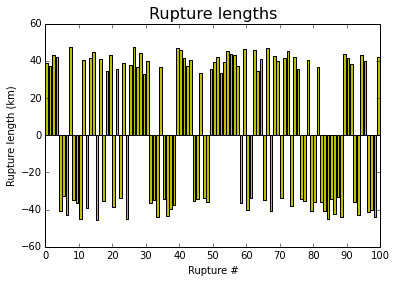

In [8]:
from matplotlib.ticker import MaxNLocator

rupture_leng= np.loadtxt('rupture_length.out',delimiter=',')

#N=2
N= rupture_leng.shape[0]

#width = 0.35 

ind = np.arange(N) 
fig, ax = plt.subplots()
rects1 = ax.bar(ind, rupture_leng, color='y')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Rupture #')
ax.set_ylabel('Rupture length (km)')
ax.set_title('Rupture lengths', fontsize=16,color='black')
plt.show()




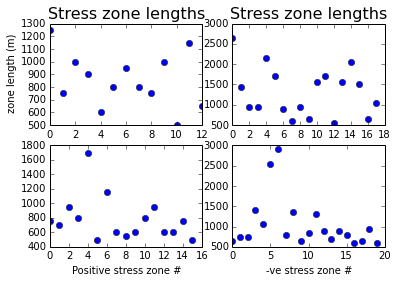

In [9]:
each_pos_zone_len= np.loadtxt('each_postv_zone_len.out',delimiter=',')
each_neg_zone_len= np.loadtxt('each_negtv_zone_len.out',delimiter=',')

each_neg_zone_array=np.trim_zeros(each_neg_zone_len[0,:])
each_pos_zone_array=np.trim_zeros(each_pos_zone_len[0,:])
each_neg_zone_array2=np.trim_zeros(each_neg_zone_len[1,:])
each_pos_zone_array2=np.trim_zeros(each_pos_zone_len[1,:])


f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(each_pos_zone_array, 'o')
axarr[1, 0].plot(each_pos_zone_array2, 'o')
axarr[0, 1].plot(each_neg_zone_array, 'o')
axarr[1, 1].plot(each_neg_zone_array2, 'o')
axarr[1, 0].set_xlabel('Positive stress zone #')
axarr[0, 0].set_ylabel(' zone length (m)')
axarr[0, 0].set_title('Stress zone lengths', fontsize=16,color='black')
axarr[1, 1].set_xlabel('-ve stress zone #')
#axarr[0, 1].set_ylabel('-ve zone length (m)')
axarr[0, 1].set_title('Stress zone lengths', fontsize=16,color='black')

plt.show()


#f, (ax1, ax2) = plt.subplots(2)
#ax1.plot(each_neg_zone_array, 'o')
#ax2.plot(each_pos_zone_array, 'o')
#ax3.plot(each_neg_zone_array1, 'o')
#ax4.plot(each_pos_zone_array1, 'o')
#ax[0,1].plot( each_neg_zone_array,'o' )
#ax1.set_xlabel('Positive stress zone #')
#ax1.set_ylabel('-ve zone length (m)')
#ax1.set_title('Stress zone lengths', fontsize=16,color='black')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax2.set_xlabel(' stress zone #')
#ax2.set_ylabel('+ve zone length (m)')
#ax2.set_title('Positive stress zone lengths', fontsize=16,color='black')
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#plt.show()
